In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
calibration_num = 1
loc_name = 'adana'

calibration_csv = u'../output/calibration/{}/{}.csv'.format(calibration_num, loc_name)
calibration_xlsx = u'../output/calibration/{}/{}.xlsx'.format(calibration_num, loc_name)


In [3]:
df = pd.read_csv(open(calibration_csv, 'rb'))
df['sample_id'] = list(range(1,df.shape[0]+1))

N_values = pd.read_excel(open(calibration_xlsx, 'rb'))['% Azot'].values
df['%N'] = N_values

In [4]:
df.columns

Index(['C 1 @ 279.408', 'C 1 @ 279.482', 'C 2 @ 280.146', 'C 3 @ 285.075',
       'C 3 @ 285.149', 'K 1 @ 460.714', 'K 1 @ 460.716', 'K 2 @ 553.656',
       'K 3 @ 280.146', 'N 1 @ 589.024', 'N 1 @ 589.116', 'N 2 @ 279.482',
       'N 3 @ 334.762', 'N 4 @ 421.624', 'N 5 @ 443.506', 'N 5 @ 443.613',
       'P 1 @ 334.762', 'P 1 @ 334.83', 'P 2 @ 553.656', 'P 3 @ 317.881',
       'P 4 @ 407.871', 'sample_id', '%N'],
      dtype='object')

In [5]:
class CalibrationColumn:
    """

        Args:
            colname(str):

    """
    def __init__(self, colname):

        parts = colname.split(' ')
        self.raw_name = parts[0]
        self.name = parts[0].lower()
        self.id = int(parts[1])
        self.nm = float(parts[-1])

    def __str__(self):
        return '{el} {id} @ {nm}'.format(el=self.raw_name,
                                         id=self.id,
                                         nm=self.nm)
    
    def __repr__(self):
        return self.__str__()

In [6]:
elements = [CalibrationColumn(colname) for colname in df.columns[:-2]]
elements


[C 1 @ 279.408,
 C 1 @ 279.482,
 C 2 @ 280.146,
 C 3 @ 285.075,
 C 3 @ 285.149,
 K 1 @ 460.714,
 K 1 @ 460.716,
 K 2 @ 553.656,
 K 3 @ 280.146,
 N 1 @ 589.024,
 N 1 @ 589.116,
 N 2 @ 279.482,
 N 3 @ 334.762,
 N 4 @ 421.624,
 N 5 @ 443.506,
 N 5 @ 443.613,
 P 1 @ 334.762,
 P 1 @ 334.83,
 P 2 @ 553.656,
 P 3 @ 317.881,
 P 4 @ 407.871]

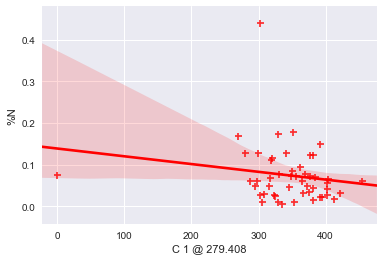

In [18]:
regplot = sns.regplot(data=df, x=str(elements[0]), y='%N', color='r', marker='+')

In [8]:
regplot.get_figure().savefig('fig.png')

In [9]:
def plot_calibrations(elements, path):
    for element in elements:
        regplot = sns.regplot(data=df, x=str(element), y='%N', color='r', marker='+')
        regplot.get_figure().savefig(os.path.join(path,'{}.png'.format(str(element))))
        plt.clf()

In [10]:
plot_calibrations(elements, '../output/calibration_plots')

In [13]:
df

,C 1 @ 279.408,C 1 @ 279.482,C 2 @ 280.146,C 3 @ 285.075,C 3 @ 285.149,K 1 @ 460.714,K 1 @ 460.716,K 2 @ 553.656,K 3 @ 280.146,N 1 @ 589.024,...,N 4 @ 421.624,N 5 @ 443.506,N 5 @ 443.613,P 1 @ 334.762,P 1 @ 334.83,P 2 @ 553.656,P 3 @ 317.881,P 4 @ 407.871,sample_id,%N
0,376.744999,376.744999,0.0,148.876501,0.0,0.0,0.0,255.689328,0.0,473.404729,...,0.0,0.0,0.0,187.230955,187.230955,0.0,0.0,0.0,1,0.073
1,347.977370,347.977370,0.0,145.999822,0.0,0.0,0.0,235.400457,0.0,407.366470,...,0.0,0.0,0.0,180.219256,180.219256,0.0,0.0,0.0,2,0.073
2,299.621322,299.621322,0.0,140.948176,0.0,0.0,0.0,0.000000,0.0,475.832805,...,0.0,0.0,0.0,197.394618,197.394618,0.0,0.0,0.0,3,0.129
3,280.025545,280.025545,0.0,126.654967,0.0,0.0,0.0,0.000000,0.0,451.799484,...,0.0,0.0,0.0,217.217729,217.217729,0.0,0.0,0.0,4,0.129
4,330.701521,330.701521,0.0,138.064464,0.0,0.0,0.0,521.332234,0.0,559.241722,...,0.0,0.0,0.0,192.544282,192.544282,0.0,0.0,0.0,5,0.078
5,328.685533,328.685533,0.0,143.899423,0.0,0.0,0.0,0.000000,0.0,549.121479,...,0.0,0.0,0.0,211.314157,211.314157,0.0,0.0,0.0,6,0.011
6,352.870576,352.870576,0.0,146.660894,0.0,0.0,0.0,0.000000,0.0,647.102081,...,0.0,0.0,0.0,210.657512,210.657512,0.0,0.0,0.0,7,0.011
7,268.662274,268.662274,0.0,126.569963,0.0,0.0,0.0,347.003620,0.0,416.829590,...,0.0,0.0,0.0,191.073800,191.073800,0.0,0.0,0.0,8,0.168
8,305.859056,305.859056,0.0,135.903125,0.0,0.0,0.0,263.953025,0.0,744.778720,...,0.0,0.0,0.0,330.606936,330.606936,0.0,0.0,0.0,9,0.011
9,319.070310,319.070310,0.0,141.760971,0.0,0.0,0.0,0.000000,0.0,654.464567,...,0.0,0.0,0.0,299.811379,299.811379,0.0,0.0,0.0,10,0.112


In [15]:
x = df['C 1 @ 279.408'].values
y = df['%N'].values
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) 

In [20]:
slope*400 + intercept

0.06446537868708388

0.13895348688030895